In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

In [23]:
display(data.head())

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [31]:
col_float = []
col_int = []
for c in data.columns:
    if data[c].dtype == np.float64:
        col_float.append(c)
    elif data[c].dtype == np.int64:
        if c != 'id':
            col_int.append(c)
        

print(col_float)
print(col_int)

['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']
['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']


## Correlation matrix for normalized columns

First of all I want to find if there are some correlations between normalized columns. To found this variables, I create a for loop to select variable with <code>dtype = np.float64</code>. From the correlation matrix we can see that the correlations are very close to 0 for many variables and there is a strange pattern of correlation matrix plot on bottom rigth side (i.e. from variable <code>f_22</code> to variable <code>f_28</code>).

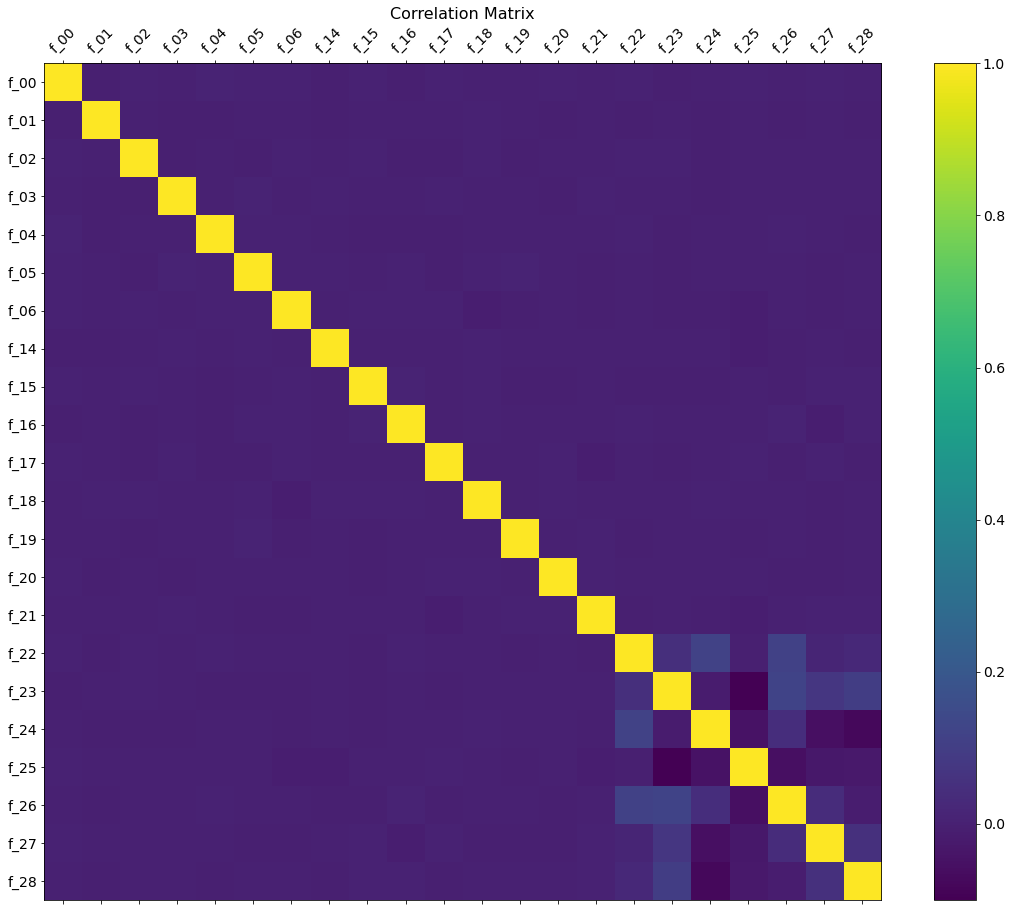

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data[col_float].corr(), fignum=f.number)
plt.xticks(range(data[col_float].select_dtypes(['number']).shape[1]), data[col_float].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data[col_float].select_dtypes(['number']).shape[1]), data[col_float].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Analyze int64 columns

The rest of the Dataframe object have int64 dtype Series. Excepted the <code>id</code> column (removed from this analysis). At the beginning of the analysis I assumed that the true nature of the variables is categorical and these columns were converted into <code>int</code> to be ready to analyze. However each hist have the same feature: an higher density for obs below 10. Because this trait of the plots I've to reconsider my previous the previous assumption and it's more likely that the type of columns is <code>int</code>. So I can plot a correlation matrix with all variables (except <code>id</code>). The result is very interesting: I can see clearly that there are specifc variables (from <code>f_07</code> to <code>f_13</code> and from <code>f22</code> to <code>f_28</code>) with different correlations). The rest of the of the variables seems to bee indipendent with every other variable(because all of them are normally distributed, uncorrelation implies independence).

So the question is: Have I to keep in Dataset for analysis this variables?

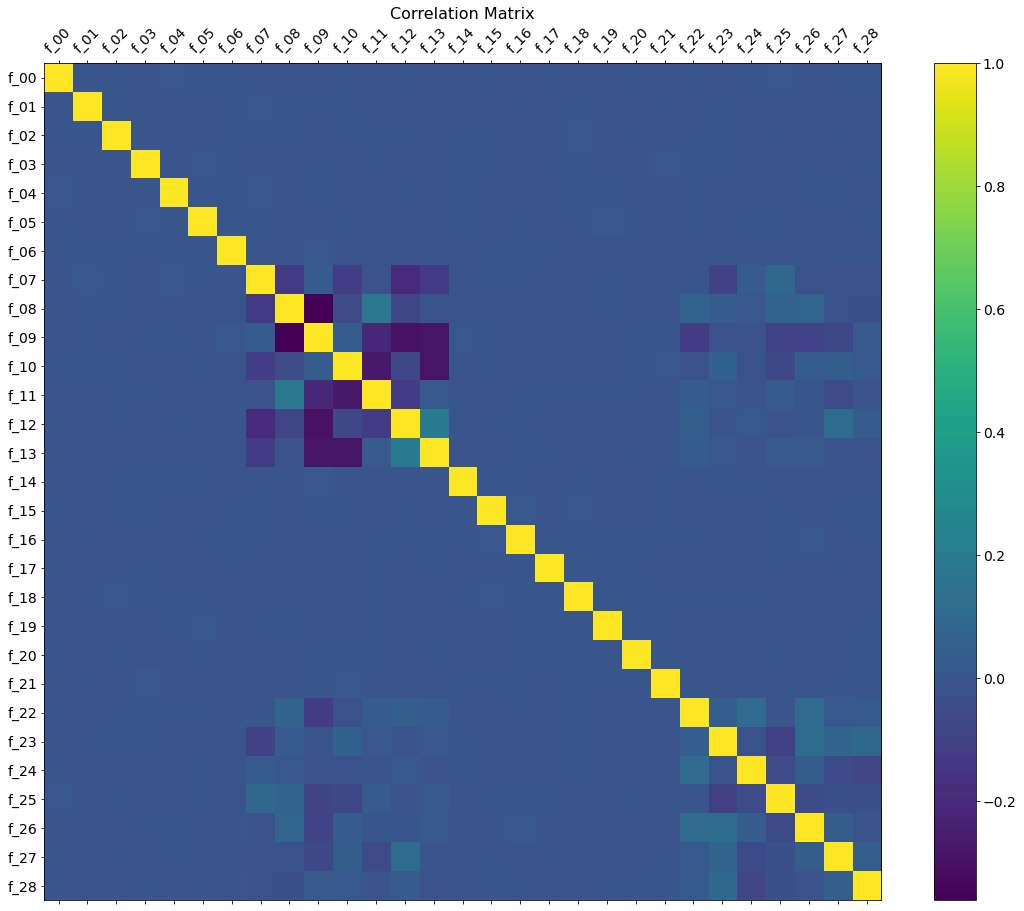

In [37]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.drop('id', axis = 1).corr(), fignum=f.number)
plt.xticks(range(data.drop('id', axis = 1).select_dtypes(['number']).shape[1]), data.drop('id', axis = 1).select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.drop('id', axis = 1).select_dtypes(['number']).shape[1]), data.drop('id', axis = 1).select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);